In [45]:
#import needed libraries
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [46]:
#Loading Data_set
df = data = pd.read_csv("/content/car_purchasing_data.csv",encoding='ISO-8859-1')

In [47]:
df.shape

(512, 9)

In [48]:
#read data_set columns
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [49]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [50]:
#Drop unneeded column
df.drop(columns=['customer name', 'customer e-mail', 'country'], inplace=True)
df.dropna(subset=['gender'], inplace = True)

In [51]:
#Visualize the data_set
#visualize credit card Vs purchase amount
px.scatter(df,x='credit card debt',y='car purchase amount',color='credit card debt',title='<b>credit card debt Versus purchase amount')

In [52]:
#visualize net Worth Vs purchase amount
px.scatter(df,x='net worth',y='car purchase amount',color='net worth',title='<b>net worth Versus purchase amount')


In [53]:
#visualize Annual Salary Vs Purchase Amount
px.scatter(df,x='annual Salary',y='car purchase amount',color='annual Salary',title='<b>annual Salary Versus purchase amount')

In [54]:
#Define X and Y
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']


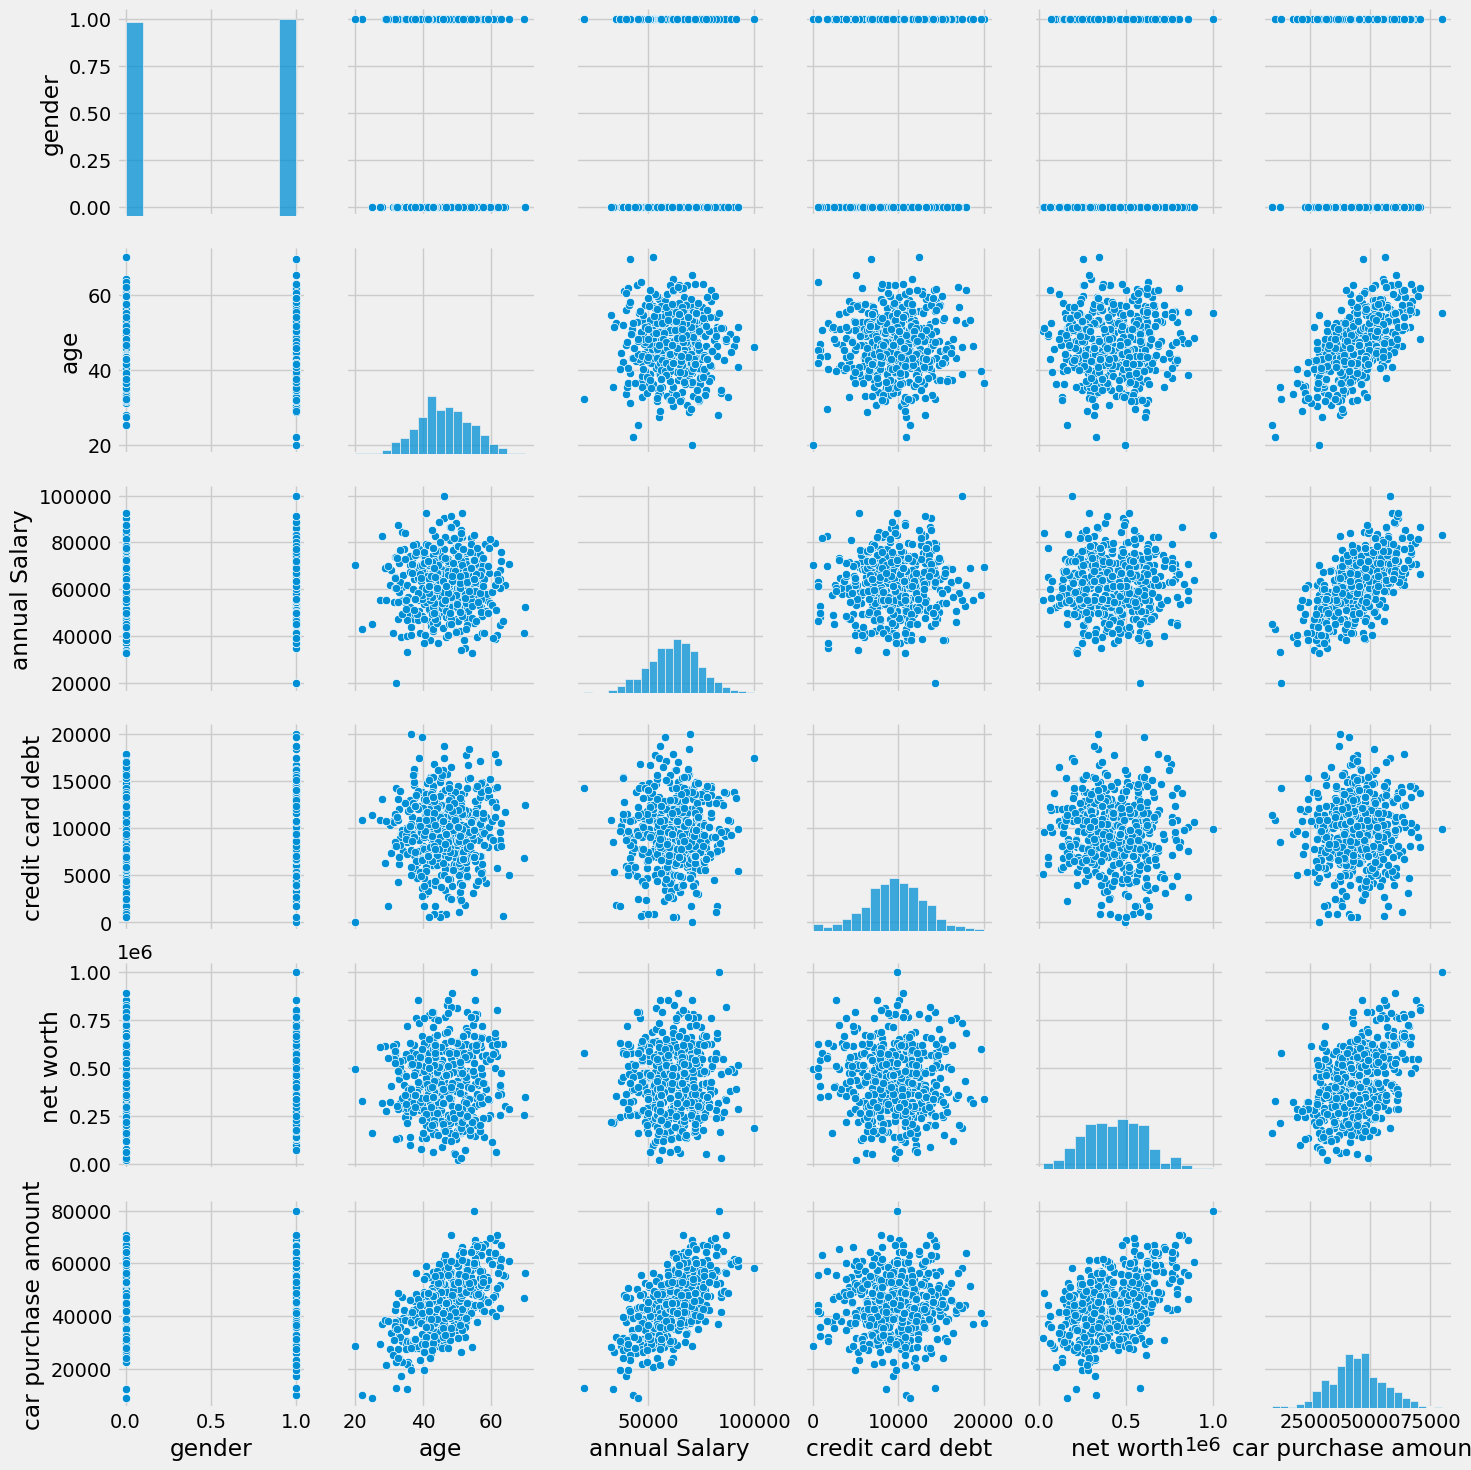

In [55]:
sns.pairplot(df);

In [56]:
#Data scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [57]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(409, 5)
(409, 1)
(103, 5)
(103, 1)


In [58]:
# Building the ANN model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25, activation='relu', input_dim=5))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                150       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826 (3.23 KB)
Trainable params: 826 (3.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
#Train the ANN model
epochs_hist = model.fit(X_train,y_train,epochs=500,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/500
7/7 [==============================] - 1s 32ms/step - loss: 0.4624 - mean_absolute_error: 0.6549 - val_loss: 0.3862 - val_mean_absolute_error: 0.5975
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.3336 - mean_absolute_error: 0.5534 - val_loss: 0.2788 - val_mean_absolute_error: 0.5044
Epoch 3/500
7/7 [==============================] - 0s 13ms/step - loss: 0.2379 - mean_absolute_error: 0.4644 - val_loss: 0.1948 - val_mean_absolute_error: 0.4178
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 0.1635 - mean_absolute_error: 0.3795 - val_loss: 0.1269 - val_mean_absolute_error: 0.3303
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 0.1027 - mean_absolute_error: 0.2934 - val_loss: 0.0734 - val_mean_absolute_error: 0.2398
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0563 - mean_absolute_error: 0.2079 - val_loss: 0.0362 - val_mean_absolute_error: 0.1589
Epoch 7/500
7/7 [===========

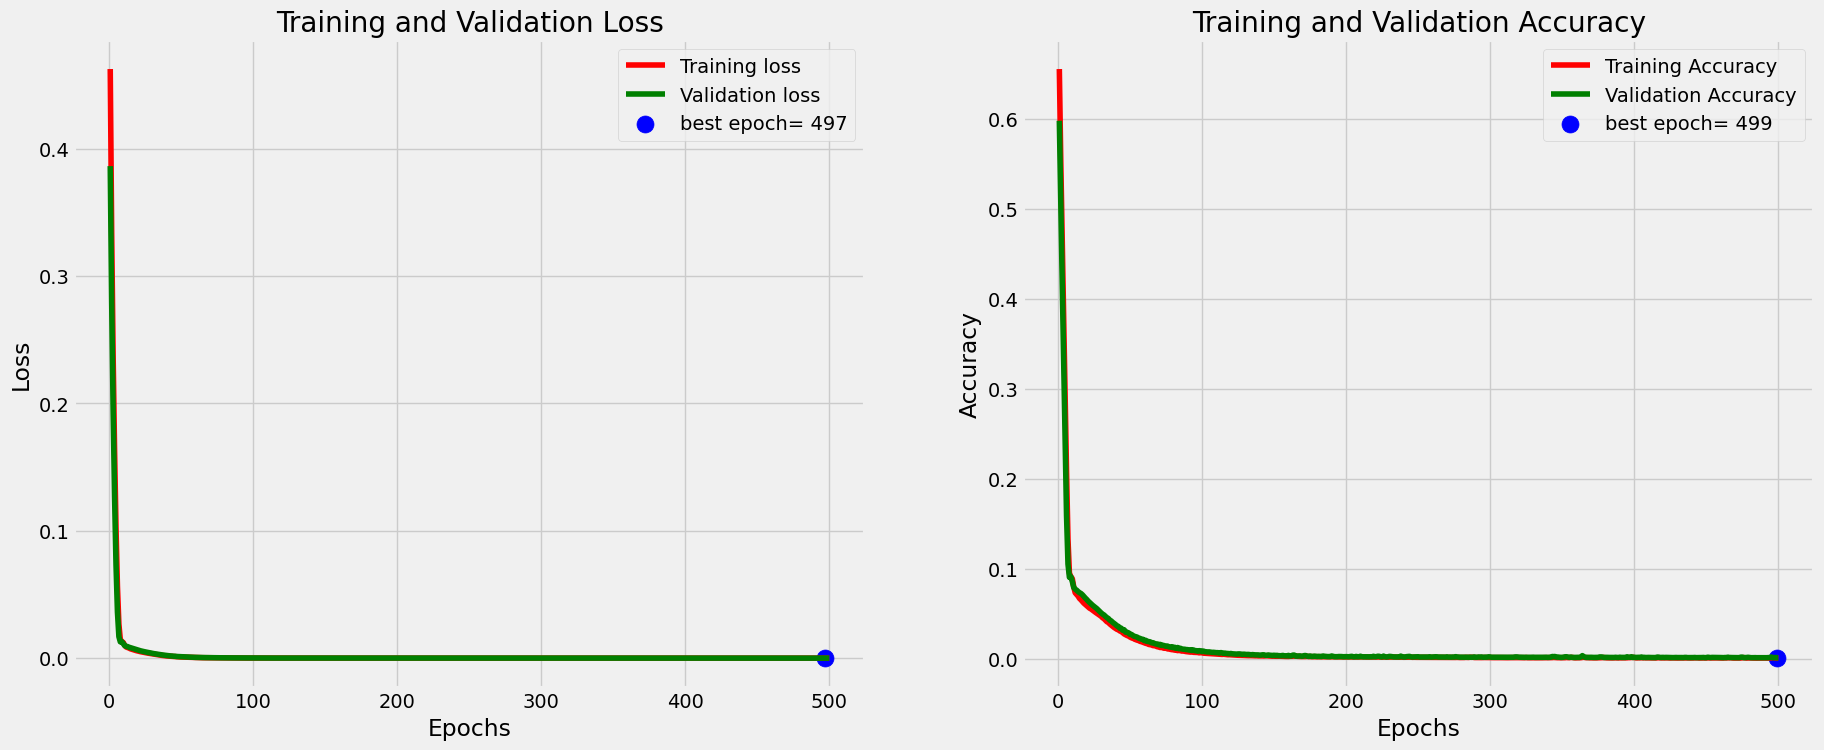

In [60]:
# Define needed variables
tr_acc = epochs_hist.history['mean_absolute_error']
tr_loss = epochs_hist.history['loss']
val_acc = epochs_hist.history['val_mean_absolute_error']
val_loss = epochs_hist.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [61]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [62]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test,y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9992776690821256


In [63]:
# Define a sample data point for prediction
X_random_sample = np.array([[1, 55, 65000, 11600, 562341]])

# Predict the sales amount using the trained model
predicted_sales_amount = model.predict(X_random_sample)

# Extract and print the predicted sales amount
print('Predicted Sales Amount is =', predicted_sales_amount[0][0])


1/1 [==============================] - 0s 57ms/step
Predicted Sales Amount is = 129460.75
